SCRIPT DNN

For this weeks assignment we will be training DNN on the MNIST Dataset. THe dataset was obtained from the link below :- https://deepai.org/dataset/mnist

Description for Dataset :- The MNIST database, is a low-complexity data collection of handwritten digits used to train and test various supervised machine learning algorithms. The database contains 70,000 28x28 black and white images representing the digits zero through nine. The data is split into two subsets, with 60,000 images belonging to the training set and 10,000 images belonging to the testing set. The separation of images ensures that given what an adequately trained model has learned previously, it can accurately classify relevant images not previously examined. We will be classifying the images using DNN( Deep Neural Networks). We can also use CNN for classification of images.


In [6]:
import tensorflow as tf
import keras
from tensorflow.keras.callbacks import TensorBoard
import time
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Importing dataset Directly from Tensorflow Library
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [11]:
print("Training Dataset: {}".format(train_images.shape))
print("Training Labels Dataset: {}".format(train_labels.shape))
print("Testing Dataset: {}".format(test_images.shape))
print("Testing Labels Dataset: {}".format(test_labels.shape))

Training Dataset: (60000, 28, 28)
Training Labels Dataset: (60000,)
Testing Dataset: (10000, 28, 28)
Testing Labels Dataset: (10000,)


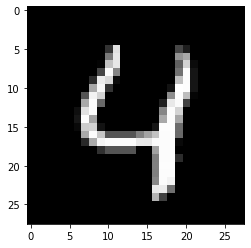

In [14]:
image = test_images[4].reshape(28, 28)
plt.imshow(image, cmap='gray')

In [15]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [25]:
print("Sample Training Dataset {}".format(train_images[0]))

Sample Training Dataset [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 25

In [26]:
print("Sample Training label Dataset {}".format(train_labels[0:5]))

Sample Training label Dataset [5 0 4 1 9]


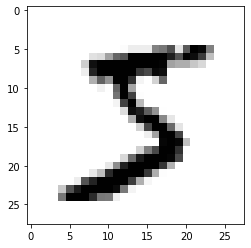

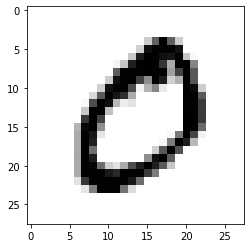

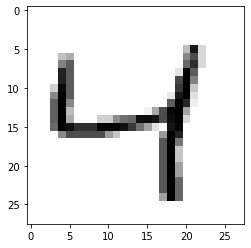

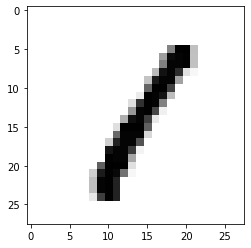

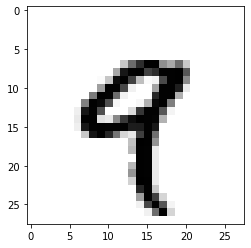

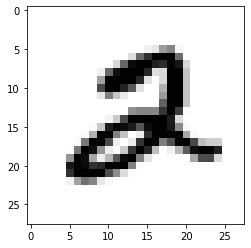

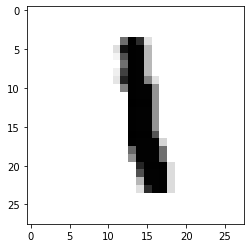

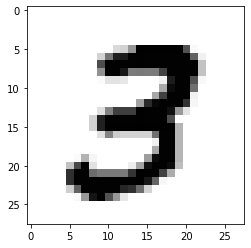

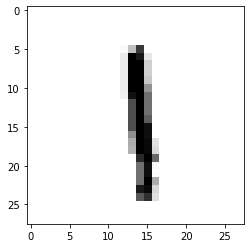

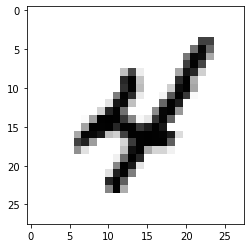

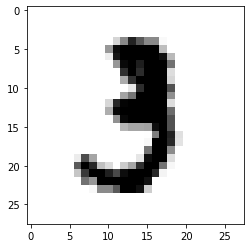

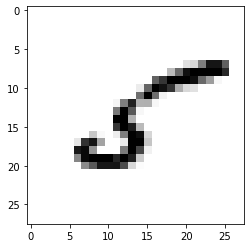

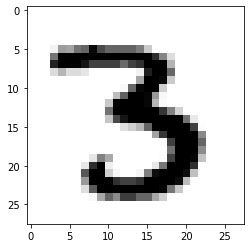

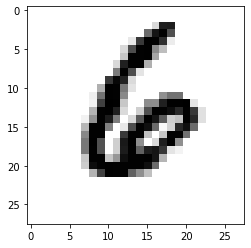

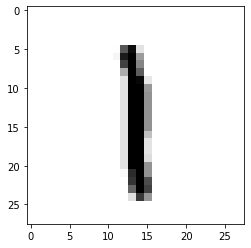

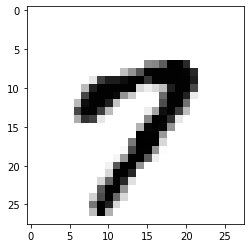

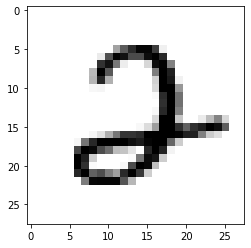

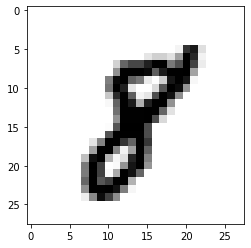

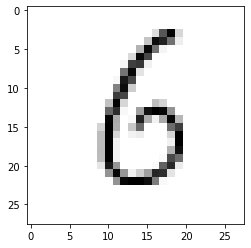

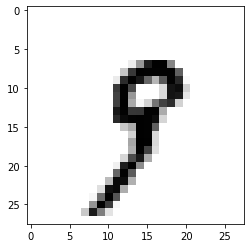

In [27]:
for i in range(0,20):
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.show()

In [28]:
#Normalize the training and testing dataset
train_images = tf.keras.utils.normalize(train_images, axis = 1)
test_images = tf.keras.utils.normalize(test_images,axis = 1)

In [29]:
#Printing the result after normalization
print("Training Data after normalizing is {}".format(train_images[0]))
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("---------------------------------------------------------")
print("Testing  Data after normalizing is {}".format(test_images[0]))

Training Data after normalizing is [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       

In [30]:
#DNN performing it on 6000 samples
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # softmax for probability distribution
model.compile(optimizer = "adam" , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )
model.fit(train_images,train_labels,epochs = 3 )
predictions = model.predict([test_images])

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2643 - acc: 0.9231
Epoch 2/3
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1048 - acc: 0.9673
Epoch 3/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0723 - acc: 0.9769


/Users/dhanashri/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [31]:
print("Probability distribution for a multi-class classification")
predictions[0]

Probability distribution for a multi-class classification


array([3.1541902e-09, 1.9032228e-07, 1.9122931e-06, 1.1476928e-04,
       6.1727012e-11, 1.9565183e-08, 1.2761032e-13, 9.9988306e-01,
       2.5283406e-09, 2.8379077e-08], dtype=float32)

In [32]:
print(np.argmax(predictions[0]))

7


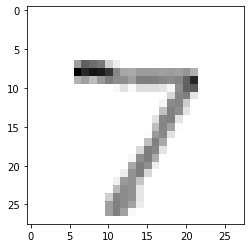

In [33]:
#Checking if the prediction is correct
plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.show()

In [34]:
#Validation loss and accuracy of the model
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss, val_acc)

0.09458223564624786 0.9696


In [35]:
predictions = model.predict([test_images])

In [36]:
print(np.argmax(predictions[0]))

7


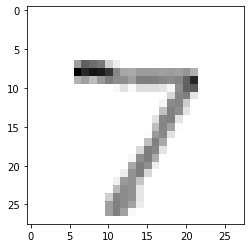

In [37]:
plt.imshow(test_images[0], cmap = plt.cm.binary)
plt.show()

In [38]:

#CNN (Convulutional Neural Networks)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
train_images /= 255
test_images /= 255


model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [39]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=train_images,y=train_labels, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 26s 428us/sample - loss: 0.2092 - acc: 0.9373
Epoch 2/3
60000/60000 [==============================] - 26s 440us/sample - loss: 0.0822 - acc: 0.9747
Epoch 3/3
60000/60000 [==============================] - 27s 443us/sample - loss: 0.0574 - acc: 0.9825
